In [1]:
import keras 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
clear_data = pd.read_csv('Titanic-Dataset.csv')

In [3]:
input_names = ['Age','Sex','Pclass']
output_names = ['Survived']

In [4]:
clear_data = clear_data.dropna(subset=input_names+output_names)
clear_data = clear_data.reset_index(drop=True)

In [5]:
clear_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
709,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
710,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
711,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
712,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df = clear_data[input_names+output_names]

In [7]:
df['Age'] = df['Age']/100
df['Sex'] = pd.DataFrame(map(lambda gen: {'male':[0],'female':[1]}.get(gen),df['Sex']))

C:\Users\1111\AppData\Local\Temp\ipykernel_9228\1492212398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age']/100
C:\Users\1111\AppData\Local\Temp\ipykernel_9228\1492212398.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = pd.DataFrame(map(lambda gen: {'male':[0],'female':[1]}.get(gen),df['Sex']))


In [8]:
df = pd.concat([df,pd.DataFrame(list(map(lambda pclass: {1:[1,0,0],2:[0,1,0],3:[0,0,1]}.get(pclass),df['Pclass'])))],axis=1)

In [9]:
input_names_2 = ['Age','Sex',0,1,2]

In [10]:
df

,Age,Sex,Pclass,Survived,0,1,2
0,0.22,0,3,0,0,0,1
1,0.38,1,1,1,1,0,0
2,0.26,1,3,1,0,0,1
3,0.35,1,1,1,1,0,0
4,0.35,0,3,0,0,0,1
...,...,...,...,...,...,...,...
709,0.39,1,3,0,0,0,1
710,0.27,0,2,0,0,1,0
711,0.19,1,1,1,1,0,0
712,0.26,0,1,1,1,0,0


In [11]:
x_train = np.array(df[input_names_2][:-10])
y_train = np.array(df[output_names][:-10])
x_test = np.array(df[input_names_2][-10:])
y_test = np.array(df[output_names][-10:])

In [12]:
x_train.shape

(704, 5)

In [13]:
y_train.shape

(704, 1)

In [14]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=20,activation='relu'))
model.add(keras.layers.Dense(units=5,activation='relu'))
model.add(keras.layers.Dense(units=1,activation='sigmoid'))

input_shape = (704,5)
model.build(input_shape)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (704, 20)                 120       
                                                                 
 dense_1 (Dense)             (704, 5)                  105       
                                                                 
 dense_2 (Dense)             (704, 1)                  6         
                                                                 
Total params: 231
Trainable params: 231
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='mse',optimizer='sgd',metrics=['accuracy'])

In [16]:
fit_results = model.fit(x=x_train,y=y_train,epochs=50,validation_split=0.2)

Epoch 1/50
18/18 [==============================] - 1s 19ms/step - loss: 0.2409 - accuracy: 0.5933 - val_loss: 0.2372 - val_accuracy: 0.5887
Epoch 2/50
18/18 [==============================] - 0s 4ms/step - loss: 0.2392 - accuracy: 0.5933 - val_loss: 0.2353 - val_accuracy: 0.5887
Epoch 3/50
18/18 [==============================] - 0s 4ms/step - loss: 0.2375 - accuracy: 0.5933 - val_loss: 0.2335 - val_accuracy: 0.5887
Epoch 4/50
18/18 [==============================] - 0s 5ms/step - loss: 0.2359 - accuracy: 0.5933 - val_loss: 0.2318 - val_accuracy: 0.5887
Epoch 5/50
18/18 [==============================] - 0s 4ms/step - loss: 0.2344 - accuracy: 0.5933 - val_loss: 0.2302 - val_accuracy: 0.5887
Epoch 6/50
18/18 [==============================] - 0s 4ms/step - loss: 0.2329 - accuracy: 0.5933 - val_loss: 0.2287 - val_accuracy: 0.5887
Epoch 7/50
18/18 [==============================] - 0s 5ms/step - loss: 0.2316 - accuracy: 0.5933 - val_loss: 0.2272 - val_accuracy: 0.5887
Epoch 8/50
18/18 [=

In [17]:
test_loss, test_acc = model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 52ms/step - loss: 0.1750 - accuracy: 0.9000


In [18]:
#model.load_weights('weight.h5')

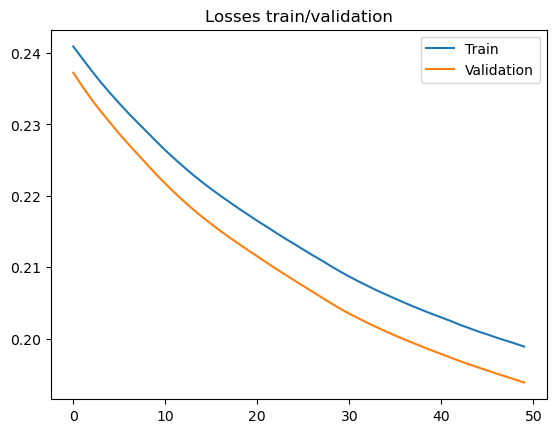

In [19]:
plt.title('Losses train/validation')
plt.plot(fit_results.history['loss'],label='Train')
plt.plot(fit_results.history['val_loss'],label='Validation')
plt.legend()
plt.show()

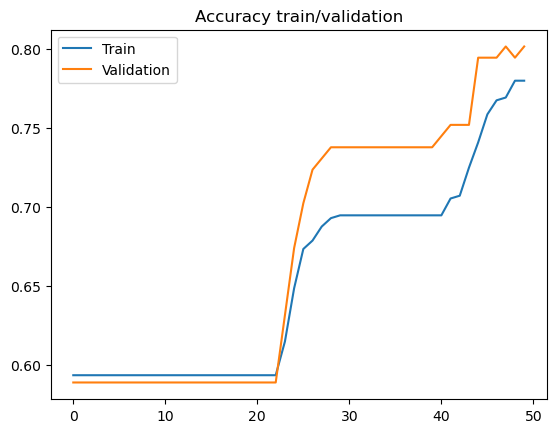

In [20]:
plt.title('Accuracy train/validation')
plt.plot(fit_results.history['accuracy'],label='Train')
plt.plot(fit_results.history['val_accuracy'],label='Validation')
plt.legend()
plt.show()

In [21]:
predicted_test = model.predict(x_test)

1/1 [==============================] - 0s 106ms/step


In [22]:
real_data = clear_data[-10:][input_names+output_names]
real_data = real_data.reset_index(drop=True)

In [23]:
real_data['Psurvived'] = predicted_test

In [24]:
real_data['Psurvived_binary'] = pd.Series(map(lambda q: 0 if q<0.5 else 1,real_data['Psurvived']))

In [25]:
real_data

,Age,Sex,Pclass,Survived,Psurvived,Psurvived_binary
0,25.0,female,2,1,0.512711,1
1,33.0,male,3,0,0.252189,0
2,22.0,female,3,0,0.394377,0
3,28.0,male,2,0,0.419941,0
4,25.0,male,3,0,0.249669,0
5,39.0,female,3,0,0.403162,0
6,27.0,male,2,0,0.420252,0
7,19.0,female,1,1,0.543196,1
8,26.0,male,1,1,0.333895,0
9,32.0,male,3,0,0.251873,0
